In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

In [20]:
x, y = sklearn.datasets.load_breast_cancer(return_X_y=True)

In [22]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## PREPROCESSING

In [23]:
x_norm = minmax_scale(x, axis=0)

In [26]:
x_norm[:,7]

array([0.73111332, 0.34875746, 0.63568588, 0.52286282, 0.51838966,
       0.40203777, 0.36779324, 0.29746521, 0.46486083, 0.42460239,
       0.16515905, 0.32833002, 0.555666  , 0.2666004 , 0.39885686,
       0.36600398, 0.26138171, 0.51093439, 0.47206759, 0.23762425,
       0.15457256, 0.10318091, 0.48489066, 0.42902584, 0.45576541,
       0.69632207, 0.43653082, 0.38424453, 0.43494036, 0.39527833,
       0.61829026, 0.25755467, 0.59791252, 0.37738569, 0.38528827,
       0.29910537, 0.27823062, 0.14527833, 0.14408549, 0.27032803,
       0.10094433, 0.28175944, 0.49507952, 0.30606362, 0.2610338 ,
       0.50149105, 0.02940855, 0.36481113, 0.13663022, 0.16819085,
       0.0554175 , 0.08563618, 0.06704771, 0.52683897, 0.16570577,
       0.11322068, 0.44701789, 0.40372763, 0.02071074, 0.03876243,
       0.06411531, 0.04601889, 0.43006958, 0.1083499 , 0.3416004 ,
       0.44875746, 0.07475149, 0.11083499, 0.21744533, 0.14234592,
       0.39517893, 0.14274354, 0.39483101, 0.25193837, 0.11292

{'whiskers': [<matplotlib.lines.Line2D at 0x16fdb997a30>,
 'caps': [<matplotlib.lines.Line2D at 0x16fdbb540d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fdb997700>,
 'medians': [<matplotlib.lines.Line2D at 0x16fdbb547f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x16fdbb54b80>,
 'means': []}

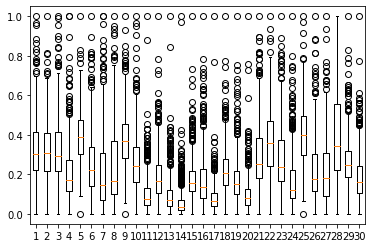

In [27]:
plt.boxplot(x_norm)

{'whiskers': [<matplotlib.lines.Line2D at 0x16fdb653ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x16fdb65e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fdb653b50>],
 'medians': [<matplotlib.lines.Line2D at 0x16fdb65ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fdb669130>],
 'means': []}

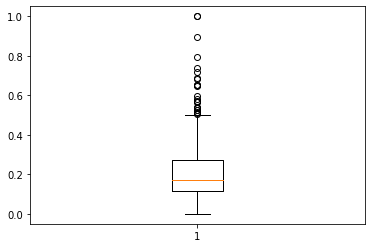

In [35]:
plt.boxplot(x_norm[:,3])

In [36]:
np.mean(x_norm[:,3])

0.2169200864011391

In [37]:
np.median(x_norm[:,3])

0.17289501590668083

In [39]:
IF = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')

In [40]:
IF.fit(x_norm)

IsolationForest()

In [42]:
outliers = x_norm[IF.predict(x_norm)==-1]

In [44]:
x_norm_wo = x_norm[IF.predict(x_norm)==1]

{'whiskers': [<matplotlib.lines.Line2D at 0x16fde052430>,
 'caps': [<matplotlib.lines.Line2D at 0x16fde052b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fde0521c0>],
 'medians': [<matplotlib.lines.Line2D at 0x16fde0592e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fde059670>],
 'means': []}

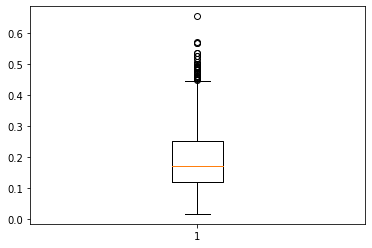

In [45]:
plt.boxplot(x_norm_wo[:,3])

In [49]:
np.min(x_norm_wo[:,3])

0.01590668080593849

In [51]:
r = np.random.random(x_norm_wo.shape)

In [57]:
x_norm_wo_wnans = np.where(r < 0.15, np.NaN, x_norm_wo)

In [58]:
x_norm_wo_wnans

array([[0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       [0.62989256, 0.15657761, 0.63098611, ..., 0.55841924, 0.15750049,
               nan],
       ...,
       [0.62232003, 0.62698681, 0.60403566, ..., 0.55945017, 0.19850187,
        0.07431457],
       [0.45525108, 0.62123774,        nan, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.03686876, 0.50152181,        nan, ..., 0.        , 0.25744136,
        0.10068215]])

In [60]:
simp = SimpleImputer(strategy='mean')

In [61]:
simp.fit(x_norm_wo_wnans)

SimpleImputer()

In [64]:
x_norm_wo_2 = simp.transform(x_norm_wo_wnans)

In [65]:
x_norm_wo - x_norm_wo_2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.03486975],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.12455013, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.29269816, ...,  0.        ,
         0.        ,  0.        ]])